# Why Imbalanced Classification is Hard?

Imbalanced classification được định nghĩa là một tập dữ liệu với tính chất là phân phối (số lượng) trên các class là không đều nhau. Imbalanced data thường xảy ra trong bài toán binary classification nơi mà số lượng của class này chỉ chiếm rất ít so với số lượng của class kia.

Ví dụ: Trong bài toán kiểm tra khách hàng rời mạng của những công ty chuyên cung cấp các dịch vụ về gói cước mạng. Họ thường rất quan tâm đến những khách hàng nào đang có xu hướng rời bỏ dịch vụ mạng của họ. Vì vậy nhà mạng cần phải tìm cách để phát hiện ra những khách hàng này để có thể lên những chiến lược chăm sóc, phục vụ khách hàng kịp thời để giữ chân khách hàng nhằm duy trì lợi nhuận của công ty. Trong bối cảnh này tỷ lệ khách hàng rời mạng sẽ chiếm rất ý so với khách hàng không rời mạng (chiếm khoảng 5%). 5% là con số tuy nhỏ nhưng so với lợi nhuận của một công ty thì đây là một tổn thất rất lớn và cũng là điều mà mọi công ty cung cấp dịch vụ mạng muốn giảm thiểu. Vậy nên con số 5% này khi đưa vào bối cảnh bài toán imbalanced binary classification thì tỷ lệ lệch rất lớn là 5% và 95%. Đây là một thách thức với những kỹ sư AI trong quá trình lên kế hoạch và triển khai giải pháp.

Bởi vì phân phối dữ liệu là không cân bằng (balanced) nên hầu hết các thuật toán Machine learning đều mang đến hiệu suất tệ và cần phải tinh chỉnh nhiều để giúp model tránh predict vào majority class trong hầu hết các trường hợp. Thêm vào đó một số metric như accuracy sẽ khó có thể đánh giá một cách hiệu quả cho những bài toán imbalanced.

Ví dụ: Với bài toán khách hàng rời mạng, khi chúng ta sử dụng accuracy làm metric đánh giá hiệu suất của model thì với độ đo này đang tập trung vào độ chính xác trên cả 2 class (rời mạng và không rời mạng). Nhưng trong thực tế chúng ta chỉ muốn quan tâm tới chất lượng của model đạt được trên duy nhất class rời mạng mà thôi. Do đó trong bối cảnh này accuracy là metric không phù hợp để chúng ta sử dụng đánh giá hay report.

Đối với bài toán imbalanced data một vấn đề phức tạp khác mà chúng ta có thể sẽ phải đối mặt đó là 2 class nhiều sample và ít sample (trong bài toán binary classification) nằm ở 2 miền phân phối khác nhau. Đây là điều mà chúng ta sẽ gặp phải khi giải quyết các bài toán như phát hiện ngoại lệ (outlier), phát hiện bất thường (anomaly), phát hiện chuẩn đoán bệnh, phát hiện giao dịch xấu....Vì vậy để model có thể học trên loại data này cũng là một vấn đề khó khăn.

# Compuding Effect of Dataset Size

Dataset size chỉ đơn giản là số lượng data được thu thập từ domain để huấn luyện và đánh giá model. Thông thường, càng nhiều dữ liệu thì càng tốt vì nó cung cấp nhiều thông tin hơn về domain. Cụ thể, nhiều dữ liệu hơn sẽ cung cấp thông tin cho model hơn, biểu diễn phân phối tốt hơn và phương sai của các đối tượng trong feature space cũng như sự ánh xạ của chúng tới nhãn lớp trở nên tốt hơn.

Nếu tỷ lệ số lượng các mẫu trong majority so với minority class phần nào cố định, thì chúng ta kỳ vọng rằng sẽ có nhiều mẫu (sample) hơn trong minority class khi quy mô của tập dữ liệu được mở rộng. Tức là phân phối dữ liệu không thay đổi theo thời gian, từ đó chất lượng mô hình sẽ ổn định và có thể tốt hơn theo thời gian. Và ngược lại khi tỷ lệ này không cố định, chúng ta sẽ luốn gặp khó khăn trong cả 2 quá trình: xây dựng model và serving model (triển khai model vào sản phẩm thực tế)

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib as plt
import numpy as np

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


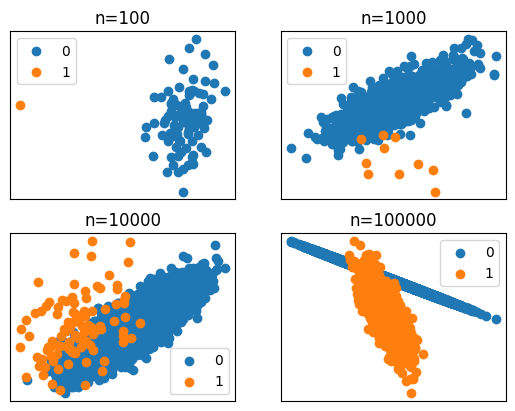

In [3]:
# dataset sizes
sizes = [100, 1000, 10000, 100000]

for i in range(len(sizes)):
  n = sizes[i]

  # create the dataset
  X, y = make_classification(n_samples=n, n_features=2, n_redundant=0,
  n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

  # summarize class distribution
  counter = Counter(y)
  print('Size=%d, Ratio=%s' % (n, counter))
  plt.pyplot.subplot(2, 2, 1+i)
  plt.pyplot.title('n=%d' % n)
  plt.pyplot.xticks([])
  plt.pyplot.yticks([])

  for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  plt.pyplot.legend()

# show the figure
plt.pyplot.show()

# Compounding Effect of Label Noise

Label noise đề cập đến các sample thuộc về một class nhưng được gắn nhãn là một class khác. Cái này có thể khiến việc xác định boundary giữa các class trong feature space trở thành vấn đề đối với hầu hết các thuật toán Machine learning và độ khó này thường tăng tỷ lệ thuận với tỷ lệ nhiễu trong nhãn.

Nguyên nhân này thường xảy ra trong quá trình thu thập dữ liệu, đây là sự sai sót trong quá trình xác định các tập luận từ bối cảnh bài toán làm cho việc gán nhãn trở nên sai sót. Đối với imbalanced data, các label noise thậm chí còn có tác động mạnh mẽ hơn.

Ví dụ: Về bản chất dữ liệu đang bị lệch với class 0 là 5% và class 1 là 95%. Nhưng khi label noise xảy ra với trường hợp noise lên đến 5% thì tỷ lệ lệch lúc này sẽ là 10% cho class 0 và class 1 là 90%. Điều đó cũng đã làm thay đổi luôn phân phối data. Tác động đến những bước xử lý phía sau.


Hơn hết việc các sample từ majority class được đánh nhãn sai và thuộc về minority class làm cho việc xậy dựng đường thẳng/boundary giữa các class trở nên sai lêch.

Noise=0%, Ratio=Counter({0: 990, 1: 10})
Noise=1%, Ratio=Counter({0: 983, 1: 17})
Noise=5%, Ratio=Counter({0: 963, 1: 37})
Noise=7%, Ratio=Counter({0: 959, 1: 41})


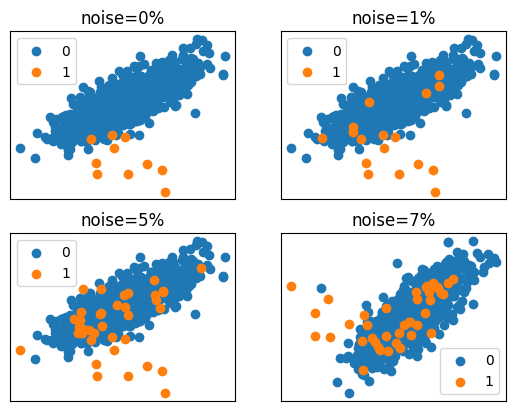

In [4]:
# label noise ratios
noise = [0, 0.01, 0.05, 0.07]

for i in range(len(noise)):
  n = noise[i]
  # create the dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
  n_clusters_per_class=1, weights=[0.99], flip_y=n, random_state=1)
  counter = Counter(y)

  print('Noise=%d%%, Ratio=%s' % (int(n*100), counter))
  # define subplot
  plt.pyplot.subplot(2, 2, 1+i)
  plt.pyplot.title('noise=%d%%' % int(n*100))
  plt.pyplot.xticks([])
  plt.pyplot.yticks([])

  for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  plt.pyplot.legend()

plt.pyplot.show()